## **Training a simple neural network to classify digits from a mnist dataset**

## **imports**


In [104]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# when i do this i need not do show
from tensorflow import keras

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)
#  so that i get a constant result everytime

## **Data**

In [77]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [78]:
print(x_train.shape,y_train.shape)
print(x_test.shape ,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## **Visualise examples**

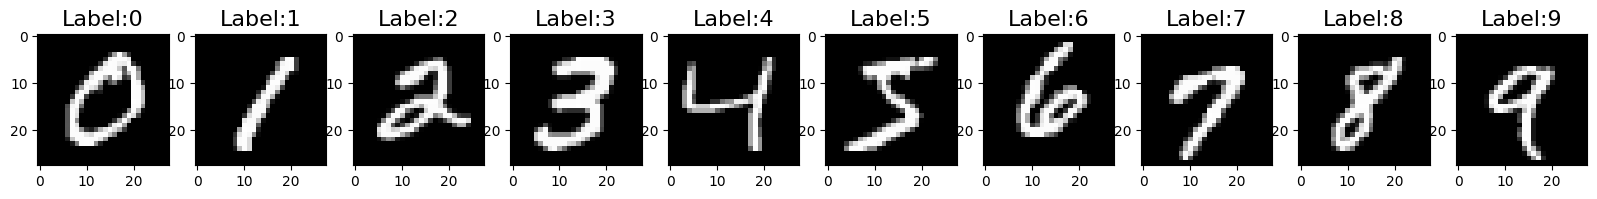

In [79]:
num_classes=10

f,ax=plt.subplots(1,num_classes,figsize=(20,20))

for i in range(0,num_classes):
  sample=x_train[y_train==i][0]
  ax[i].imshow(sample,cmap='gray')
  ax[i].set_title("Label:{}".format(i),fontsize=16)

In [80]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [81]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)


In [82]:
for i in range(10):
  print(y_train[i])


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# **Prepare Data**

In [84]:
#i dont want the pixel to be between 0-255 so i want it between 0 and 1 so dividing x_train and x_test by 255
x_train=x_train/255
x_test=x_test/255


In [85]:
print(x_train.shape)
# 60,000 images of size 28,28(2d)

(60000, 28, 28)



Why Reshape to (60000, 784)?<br>

➤ Neural networks (especially dense/fully connected layers) expect 1D input vectors, not 2D matrices.

In [86]:
#Reshape Data
x_train=x_train.reshape(x_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)
print(x_train.shape)


(60000, 784)


# Creating a-Fully connected Neural Network

In [89]:
model=Sequential()

model.add(Dense(units=128,input_shape=(784,),activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.25))
# 25% of the neurons are going to be dropped which prevents overfitting
model.add(Dense(units=10,activation='softmax'))
#cause you have 10 different outputs

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

# **Train**

In [90]:
batch_size=512
epochs=10
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs)


Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6873 - loss: 1.0593
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9284 - loss: 0.2486
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9487 - loss: 0.1749
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9606 - loss: 0.1336
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9654 - loss: 0.1135
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9730 - loss: 0.0919
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9746 - loss: 0.0845
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9784 - loss: 0.0725
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9794 - loss: 0.0642
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9835 - loss: 0.0540


In [91]:
test_loss,test_acc=model.evaluate(x_test,y_test)

print("Test Loss: {},Test Accuracy {}".format(test_loss,test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9753 - loss: 0.0832
Test Loss: 0.07219443470239639,Test Accuracy 0.9781000018119812


In [92]:

y_pred=model.predict(x_test)
y_pred_classes=np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[5.3645958e-06 5.5836909e-07 4.7941470e-05 ... 9.9956065e-01
  1.0991680e-05 1.6752512e-05]
 [8.4299820e-09 4.2432644e-06 9.9999374e-01 ... 1.6806088e-09
  8.8886367e-08 3.7967142e-12]
 [3.6039671e-06 9.9714553e-01 2.7325735e-04 ... 1.7922687e-03
  3.8326954e-04 5.9763799e-05]
 ...
 [2.6515773e-08 4.8214268e-09 3.5694082e-08 ... 2.4774772e-06
  2.3334217e-06 2.8845187e-05]
 [8.6979393e-09 2.0868028e-07 9.9140851e-10 ... 3.5724895e-08
  1.4602332e-04 2.9800745e-08]
 [5.5899303e-08 2.1677334e-08 4.3131482e-07 ... 2.7102650e-11
  7.4649321e-08 3.3496397e-09]]
[7 2 1 ... 4 5 6]


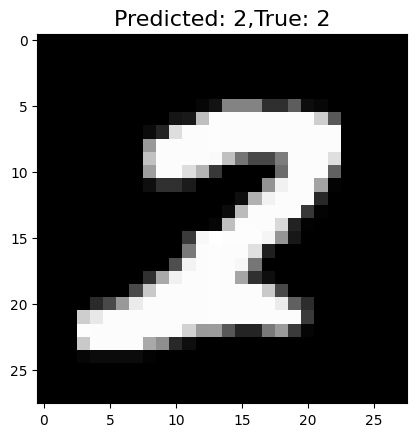

In [97]:
#Single Example
random_index=np.random.choice(len(x_test))
x_sample=x_test[random_index]
y_true=np.argmax(y_test,axis=1)
y_sample_true=y_true[random_index]
y_sample_pred_class=y_pred_classes[random_index]

plt.title("Predicted: {},True: {}".format(y_sample_pred_class,y_sample_true),fontsize=16)
plt.imshow(x_sample.reshape((28,28)),cmap="gray")


# **Confusion matrix**

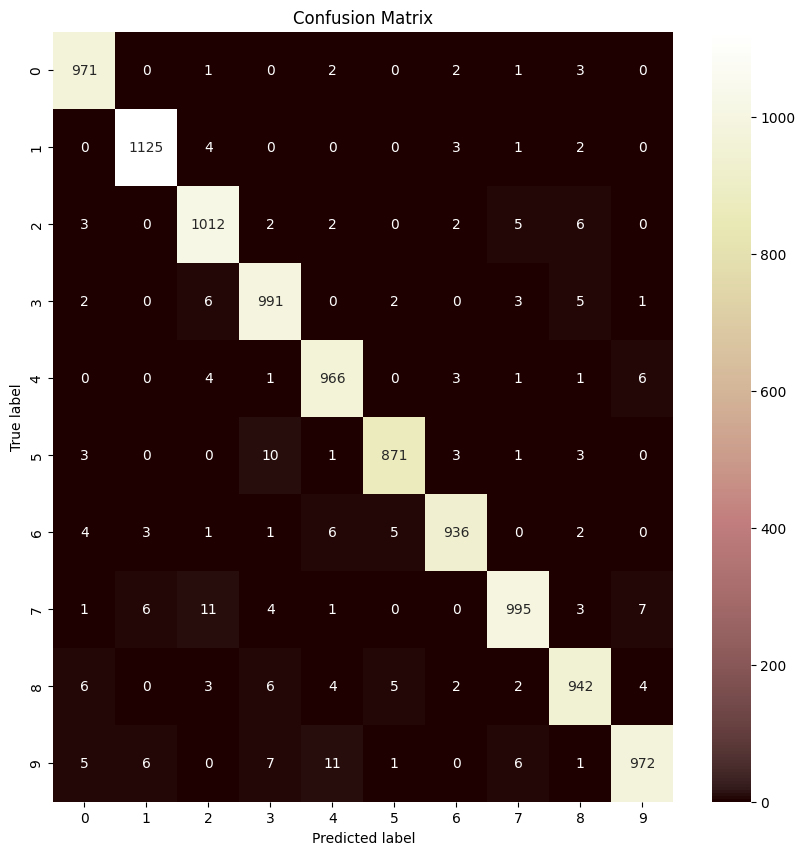

In [105]:
cm = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap="pink")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_title("Confusion Matrix")
plt.show()


# **Investigating errors**

In [107]:
errors=(y_pred_classes-y_true!=0)
y_pred_classes_errors=y_pred_classes[errors]
y_pred_errors=y_pred[errors]
y_true_errors=y_true[errors]
x_test_errors=x_test[errors]

In [109]:
y_pred_errors_probability =np.max(y_pred_errors,axis=1)
true_probability_errors=np.diagonal(np.take(y_pred_errors,y_true_errors,axis=1))
diff_errors_pred_true=y_pred_errors_probability-true_probability_errors

#Get list of indices of sorted differences
sorted_idx_diff_errors=np.argsort(diff_errors_pred_true)
top_idx_diff_errors=sorted_idx_diff_errors[-5:]

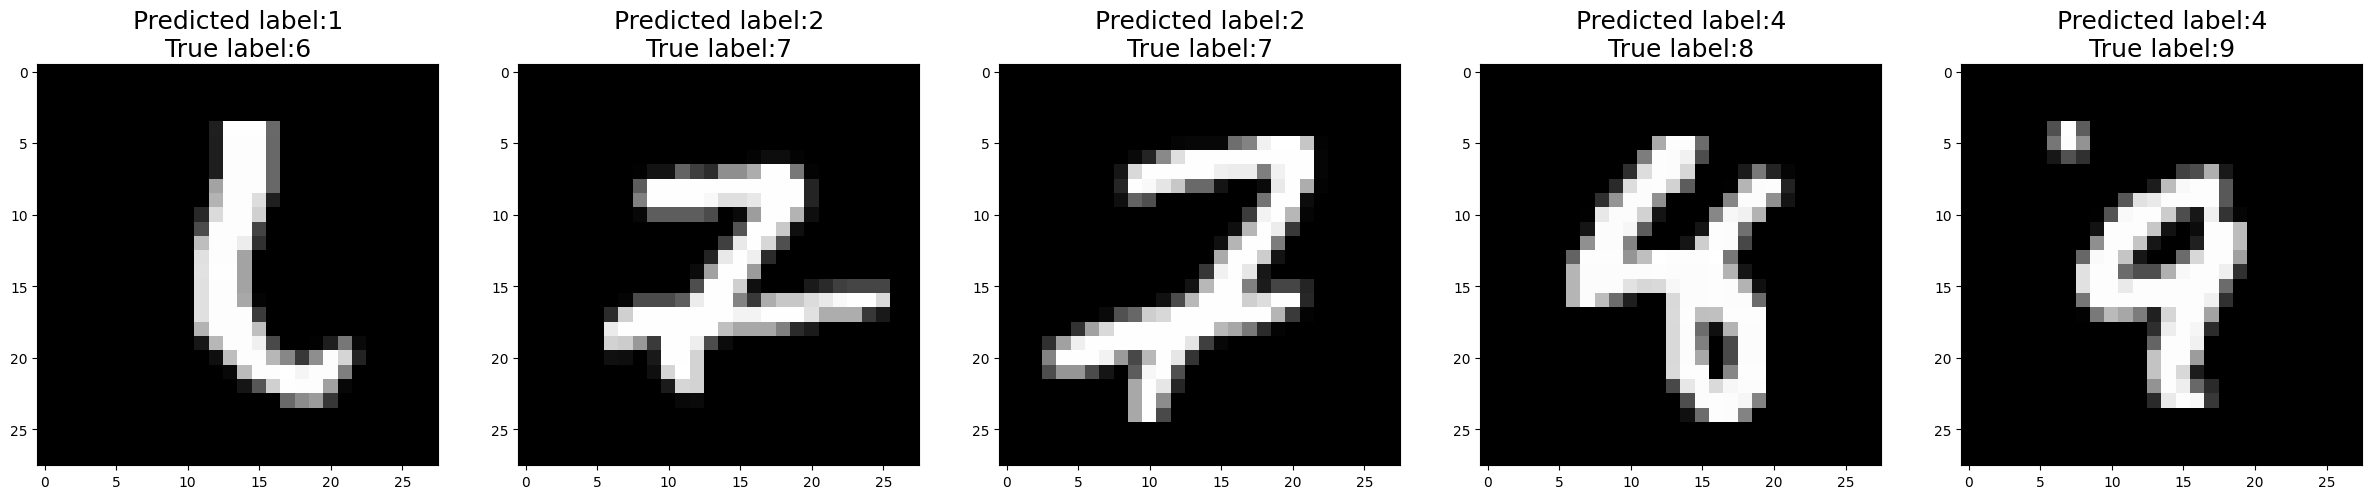

In [110]:
#show top errors
num=len(top_idx_diff_errors)
f,ax=plt.subplots(1,num,figsize=(30,30))
for i in range(0,num):
  idx=top_idx_diff_errors[i]
  sample=x_test_errors[idx].reshape(28,28)
  y_t=y_true_errors[idx]
  y_p=y_pred_classes_errors[idx]
  ax[i].imshow(sample,cmap='gray')
  ax[i].set_title("Predicted label:{}\nTrue label:{}".format(y_p,y_t),fontsize=18)